In [2]:
import os
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

In [3]:
def load_tif_image(tif_path):
    gdal_header = gdal.Open(str(tif_path))
    return gdal_header.ReadAsArray()

In [4]:
# INPE Data

inpe_path = '/home/thiago/AmazonDeforestation_Prediction/OpenSTL/data/IBAMA/25K/Geotiff-INPE/tiffs'
img_names = os.listdir(inpe_path)
print(len(img_names))
# img_names.sort()

182


In [5]:
arcs_files = list(filter(lambda x: 'ArCS' in x, img_names))
arcs_files.remove('ArCS.tif')
dear_files = list(filter(lambda x: 'DeAr' in x, img_names))
dear_files.remove('DeAr.tif')
print(len(arcs_files), len(dear_files))
data_files = arcs_files

92 88


In [10]:
import pandas as pd
data_files.sort()
print(data_files)
func = lambda x: x.split('.tif')[0][4:]
date_files = [func(file) for file in data_files]
print(date_files)
df_date = pd.DataFrame(date_files, columns=['date_str'])


['ArCS010118.tif', 'ArCS010119.tif', 'ArCS010120.tif', 'ArCS010218.tif', 'ArCS010219.tif', 'ArCS010220.tif', 'ArCS010317.tif', 'ArCS010318.tif', 'ArCS010319.tif', 'ArCS010320.tif', 'ArCS010417.tif', 'ArCS010418.tif', 'ArCS010419.tif', 'ArCS010420.tif', 'ArCS010517.tif', 'ArCS010518.tif', 'ArCS010519.tif', 'ArCS010520.tif', 'ArCS010617.tif', 'ArCS010618.tif', 'ArCS010619.tif', 'ArCS010620.tif', 'ArCS010717.tif', 'ArCS010718.tif', 'ArCS010719.tif', 'ArCS010720.tif', 'ArCS010817.tif', 'ArCS010818.tif', 'ArCS010819.tif', 'ArCS010820.tif', 'ArCS010917.tif', 'ArCS010918.tif', 'ArCS010919.tif', 'ArCS010920.tif', 'ArCS011017.tif', 'ArCS011018.tif', 'ArCS011019.tif', 'ArCS011020.tif', 'ArCS011117.tif', 'ArCS011118.tif', 'ArCS011119.tif', 'ArCS011120.tif', 'ArCS011217.tif', 'ArCS011218.tif', 'ArCS011219.tif', 'ArCS011220.tif', 'ArCS160118.tif', 'ArCS160119.tif', 'ArCS160120.tif', 'ArCS160218.tif', 'ArCS160219.tif', 'ArCS160220.tif', 'ArCS160317.tif', 'ArCS160318.tif', 'ArCS160319.tif', 'ArCS1603

In [11]:
df_date['date'] = pd.to_datetime(df_date['date_str'], format="%d%m%y")

In [12]:
df_date.head(10)
df_date = df_date.sort_values(by='date')
df_date.head(10)

,date_str,date
6,010317,2017-03-01
52,160317,2017-03-16
10,010417,2017-04-01
56,160417,2017-04-16
14,010517,2017-05-01
60,160517,2017-05-16
18,010617,2017-06-01
64,160617,2017-06-16
22,010717,2017-07-01
68,160717,2017-07-16


In [15]:
def sliding_window(input_list, window_size):
    result = []
    for i in range(len(input_list) - window_size + 1):
        window = input_list[i:i + window_size]
        result.append(window)
    return result

date_windows = sliding_window(df_date.date, 3)
print(len(date_windows))
print(date_windows)

90
[6    2017-03-01
52   2017-03-16
10   2017-04-01
Name: date, dtype: datetime64[ns], 52   2017-03-16
10   2017-04-01
56   2017-04-16
Name: date, dtype: datetime64[ns], 10   2017-04-01
56   2017-04-16
14   2017-05-01
Name: date, dtype: datetime64[ns], 56   2017-04-16
14   2017-05-01
60   2017-05-16
Name: date, dtype: datetime64[ns], 14   2017-05-01
60   2017-05-16
18   2017-06-01
Name: date, dtype: datetime64[ns], 60   2017-05-16
18   2017-06-01
64   2017-06-16
Name: date, dtype: datetime64[ns], 18   2017-06-01
64   2017-06-16
22   2017-07-01
Name: date, dtype: datetime64[ns], 64   2017-06-16
22   2017-07-01
68   2017-07-16
Name: date, dtype: datetime64[ns], 22   2017-07-01
68   2017-07-16
26   2017-08-01
Name: date, dtype: datetime64[ns], 68   2017-07-16
26   2017-08-01
72   2017-08-16
Name: date, dtype: datetime64[ns], 26   2017-08-01
72   2017-08-16
30   2017-09-01
Name: date, dtype: datetime64[ns], 72   2017-08-16
30   2017-09-01
76   2017-09-16
Name: date, dtype: datetime64[ns], 

In [19]:
for img_name in img_names:
    print(img_name)
    break
    # img_trial_path = os.path.join(inpe_path, img_name)
    # img_trial = load_tif_image(img_trial_path)
    # print(img_trial.shape)

DeAr161120.tif


In [20]:
img_trial_path = os.path.join(inpe_path, img_name)
img_trial = load_tif_image(img_trial_path)
print(img_trial.shape)
print(img_trial.max(), img_trial.min(), img_trial.mean())

img_trial[img_trial < -1e38] = -25

print(img_trial.max(), img_trial.min(), img_trial.mean())


(98, 136)
18.734074 -3.40282e+38 -inf
18.734074 -25.0 -11.428139


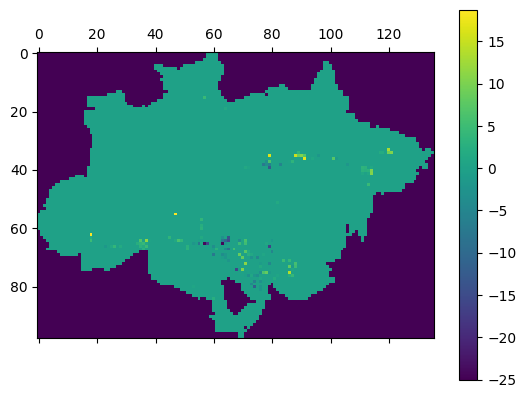

In [21]:
fig, ax = plt.subplots()
# plt.imshow(img_trial, cmap='viridis')
cax = ax.matshow(img_trial, cmap='viridis')

# Add a colorbar for reference
cbar = plt.colorbar(cax)
plt.show()

DeAr161120.tif
(98, 136)
18.734074 -3.40282e+38 -inf
18.734074 -25.0 -11.428139


/home/thiago/python-envs/base/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


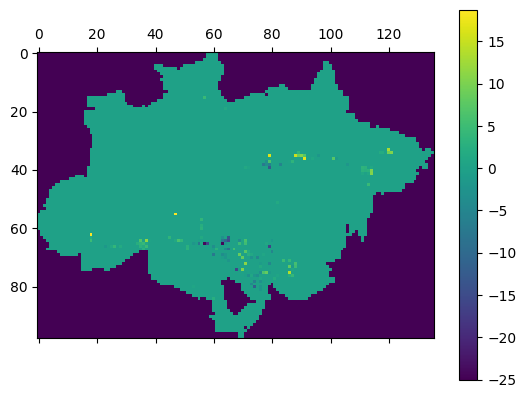

ArCS010618.tif
(98, 136)
9.546861 -3.40282e+38 -inf
9.546861 -25.0 -11.436504


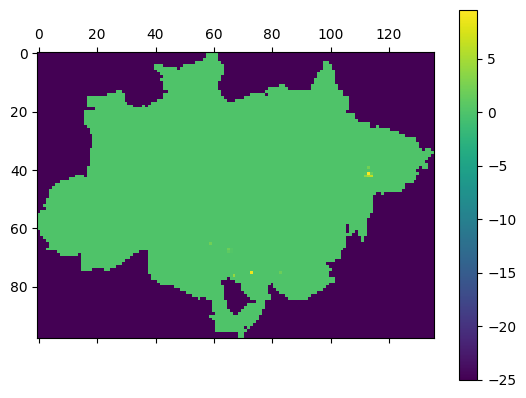

DeAr160119.tif
(98, 136)
4.55883 -3.40282e+38 -inf
4.55883 -25.0 -11.440213


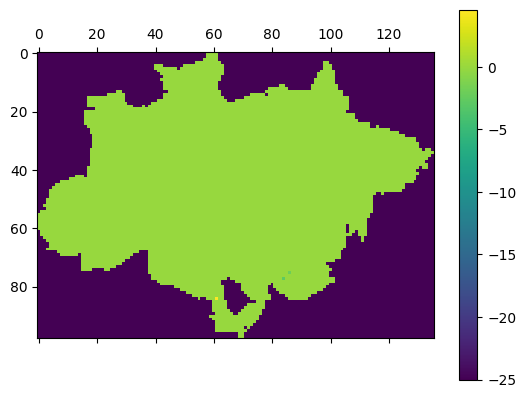

ArCS010319.tif
(98, 136)
6.2176876 -3.40282e+38 -inf
6.2176876 -25.0 -11.438318


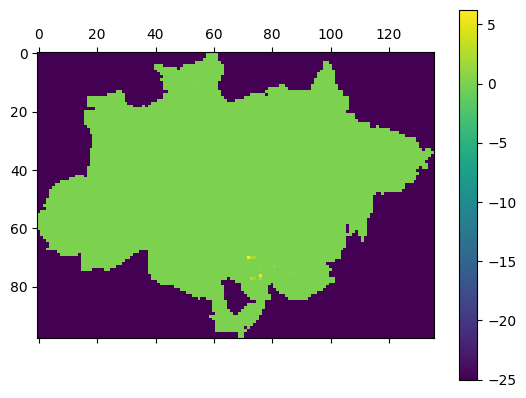

ArCS160820.tif
(98, 136)
26.86712 -3.40282e+38 -inf
26.86712 -25.0 -11.42372


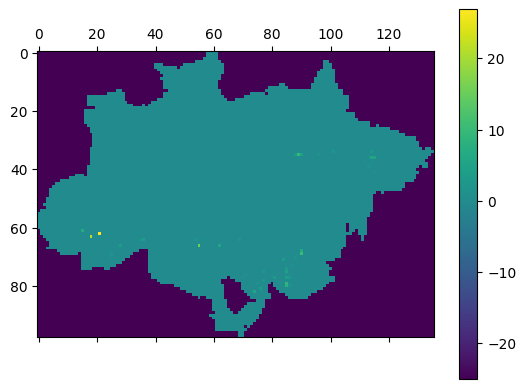

ArCS160320.tif
(98, 136)
0.0 -3.40282e+38 -inf
0.0 -25.0 -11.440201


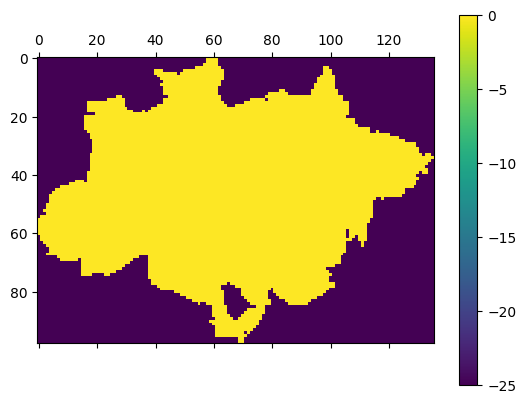

ArCS160618.tif
(98, 136)
29.588764 -3.40282e+38 -inf
29.588764 -25.0 -11.427408


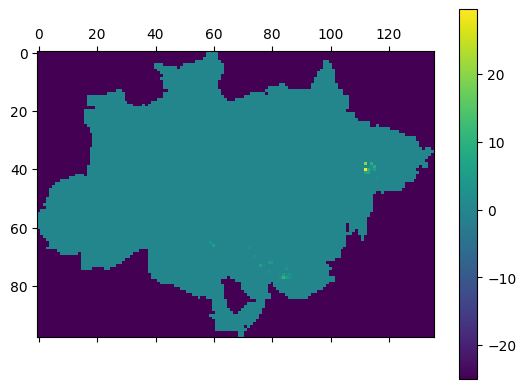

ArCS161119.tif
(98, 136)
21.396164 -3.40282e+38 -inf
21.396164 -25.0 -11.433807


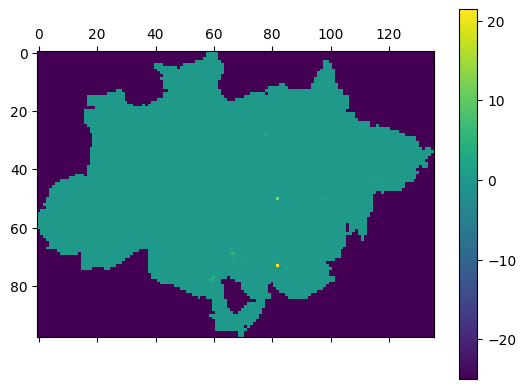

DeAr010919.tif
(98, 136)
42.959953 -3.40282e+38 -inf
42.959953 -25.0 -11.411925


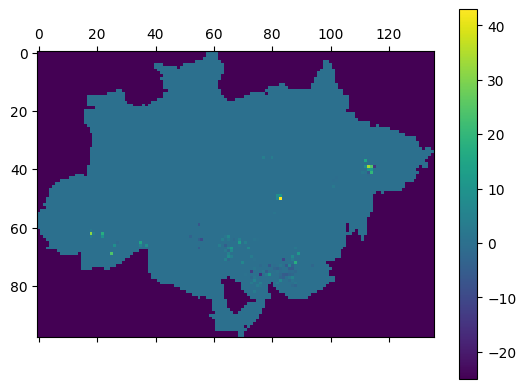

ArCS010118.tif
(98, 136)
0.0 -3.40282e+38 -inf
0.0 -25.0 -11.440201


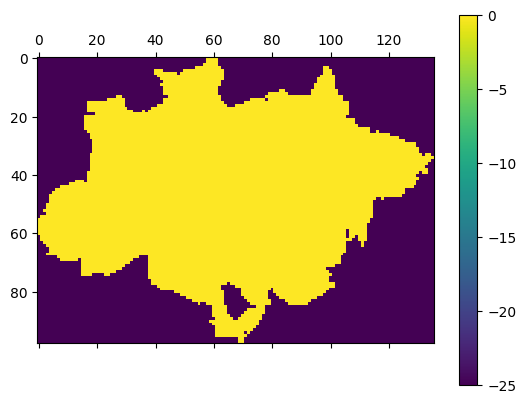

ArCS161218.tif
(98, 136)
4.55883 -3.40282e+38 -inf
4.55883 -25.0 -11.439858


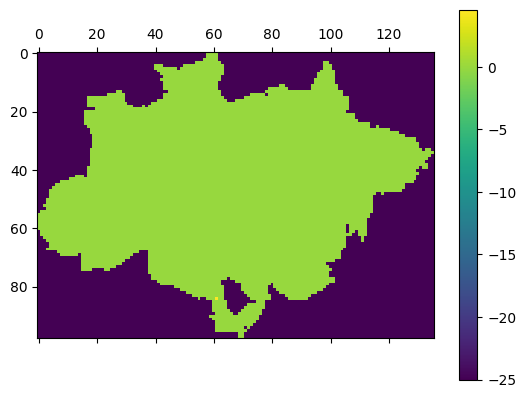

DeAr160417.tif
(98, 136)
0.70604485 -3.40282e+38 -inf
0.70604485 -25.0 -11.440148


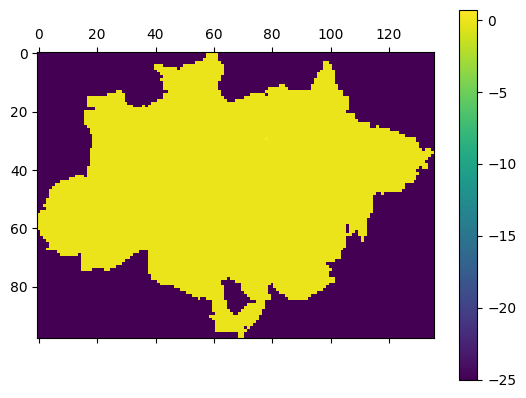

DeAr160519.tif
(98, 136)
4.092405 -3.40282e+38 -inf
4.092405 -25.0 -11.439678


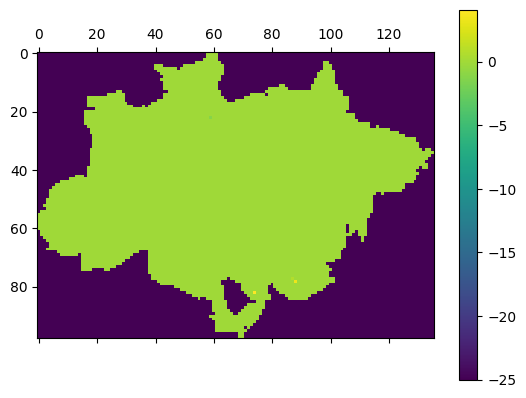

ArCS011220.tif
(98, 136)
9.306159 -3.40282e+38 -inf
9.306159 -25.0 -11.436064


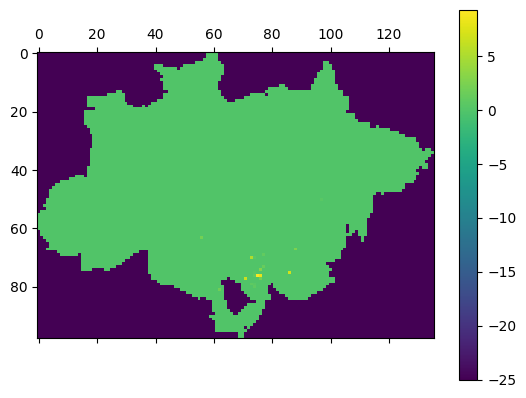

DeAr160917.tif
(98, 136)
5.788692 -3.40282e+38 -inf
5.788692 -25.0 -11.447983


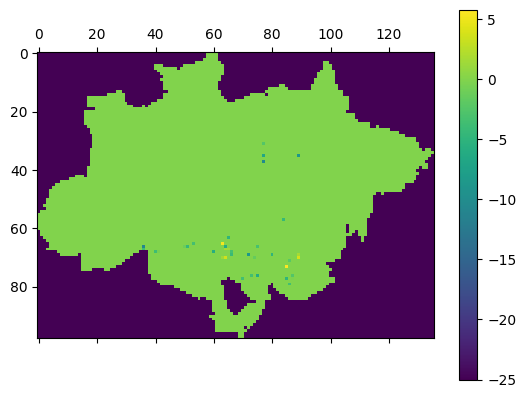

DeAr160520.tif
(98, 136)
7.0887938 -3.40282e+38 -inf
7.0887938 -25.0 -11.439061


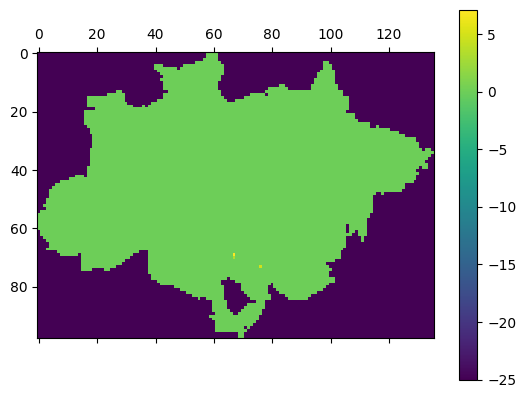

ArCS.tif
(92, 98, 136)
67.85651 -3.40282e+38 -inf
67.85651 -25.0 -11.432585


TypeError: Invalid shape (92, 98, 136) for image data

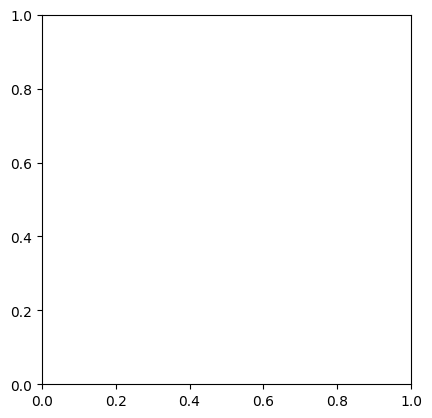

In [23]:
for img_name in img_names:
    print(img_name)
    img_trial_path = os.path.join(inpe_path, img_name)
    img_trial = load_tif_image(img_trial_path)
    print(img_trial.shape)
    print(img_trial.max(), img_trial.min(), img_trial.mean())
    img_trial[img_trial < -1e38] = -25
    print(img_trial.max(), img_trial.min(), img_trial.mean())
    fig, ax = plt.subplots()
    # plt.imshow(img_trial, cmap='viridis')
    cax = ax.matshow(img_trial, cmap='viridis')

    # Add a colorbar for reference
    cbar = plt.colorbar(cax)
    plt.show()

In [24]:
# IBAMA Data

ibama_path = 'data/IBAMA/25K/Geotiff-IBAMA_resampled'
img_names = os.listdir(ibama_path)
print(len(img_names))
img_names.sort()

18


In [30]:
ibama_img_path = os.path.join(ibama_path, 'access_minut_city.tiff')
ibama_img = load_tif_image(ibama_img_path)
print(ibama_img.shape)

(4, 98, 136)


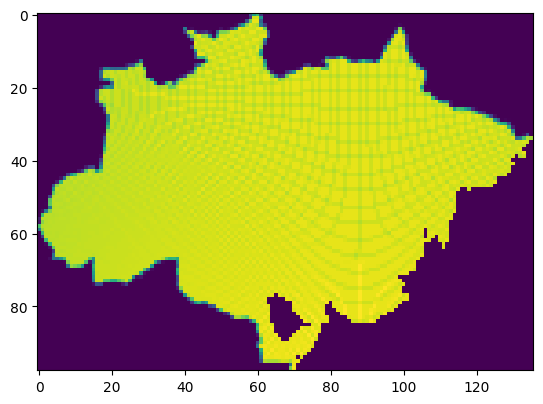

In [31]:
plt.imshow(ibama_img[0])